<h2>Part I: skip-gram</h2>

In [1]:
import numpy as np
import re

text = '''Lamine Yamal, va arribar amb 7 anys al planter de La Masia, procedent del petit club CF la Torreta. Aviat va ser considerat una de les millors promeses de l'acadèmia.

Encara que va ser inclòs en l'equip Juvenil A -ja per sobre de la seva edat- per a la temporada 2022-23, va ser seleccionat per Xavi per entrenar amb el primer equip amb altres joves a principis de setembre del 2022. Malgrat que encara no ha signat el seu primer contracte professional amb el club, Lamine Yamal sembla ser un dels membres del planter que més ha impressionat el tècnic català.

Va debutar amb el primer equip el 29 d'abril del 2023, substituint Gavi al minut 83 en la victòria per 4-0 contra el Reial Betis a la Lliga, convertint-se en el jugador més jove en debutar amb el primer equip del FC Barcelona amb 15 anys, 9 mesos i 16 dies. El 14 de maig del 2023 va guanyar el seu primer títol amb el Barça, ja que va formar part de la plantilla que va guanyar la Lliga 2022-23.

Lamine Yamal va ser titular per primera vegada amb el club el 20 d'agost del 2023 en una victòria per 2-0 contra el Cadis a l'Estadi Olímpic Lluís Companys, convertint-se en el titular més jove del Barcelona a la Lliga amb 16 anys i 38 dies. La seva primera titularitat va ser rebuda amb una gran ovació per part de l'afició quan va ser substituït mancant cinc minuts per al final del partit. En la seva següent aparició com a titular, Lamine Yamal va ser nomenat home del partit després de contribuir als dos gols marcats per Gavi i Robert Lewandowski en la victòria per 4-3 davant el Vila-real CF el 28 d'agost de 2023. Amb 16 anys i 45 dies, es va convertir en el jugador més jove a donar una assistència en un partit de Lliga. Uns dies més tard, es convertiria amb el jugador més jove del Barça a debutar a la Lliga de Campions amb 16 anys i 68 dies, superant el registre de Vicky López (16 anys i 148 dies).

El 2 d'octubre, el FC Barcelona anunciava que Lamine Yamal renovava el seu contracte fins al 2026, amb una clàusula de rescissió de 1.000 milions d'euros. Dos dies després, va ser titular al seu primer partit de la Lliga de Campions contra el Porto, convertint-se en el jugador més jove en una alineació titular amb 16 anys i 83 dies. Lamine Yamal era tres dies més jove que Celestine Babayaro, que va establir el rècord el 1994. El 8 d'octubre del 2023, Lamine va marcar el seu primer gol amb el primer equip en un empat a domicili contra el Granada (2-2). Es va convertir en el golejador més jove del Barcelona i en el més jove de la història a marcar a la Lliga, amb 16 anys i 87 dies, batent tots dos rècords establerts per Ansu Fati i Fabrice Olinga respectivament. El 28 d'octubre de 2023, Lamine va fer la seva primera aparició a El Clàssic com a suplent en una derrota per 2-1 a casa, convertint-se en el jugador més jove en ser titular amb el Barcelona des d'Ansu Fati i batent el rècord de Vicenç Martínez el 1941.

El 4 de desembre de 2023, Lamine va rebre el trofeu inaugural Golden Boy The Youngest, que es concedeix al jugador més jove nominat per al premi Golden Boy. Posteriorment, el dia de la cerimònia, Lamine no va estar present a causa dels seus estudis.

L'11 de gener del 2024, Lamine va marcar contra l'Osasuna a la victòria per 2-0 del Barcelona a la semifinal de la Supercopa d'Espanya. Es va convertir en el jugador més jove, amb 16 anys i 182 dies, a marcar a la Supercopa. Lamine va jugar els últims 29 minuts de la final de la Supercopa d'Espanya contra el Reial Madrid el 14 de gener de 2024. Es va convertir en el jugador més jove a marcar a la Copa del Rei després de marcar al minut 32 contra l'Athletic Club en una eventual derrota per 4-2 a quarts de final.

L'11 de febrer de 2024, Lamine va marcar dos gols en l'empat a 3-3 contra el Granada CF i va ser triat millor jugador del partit. Per tant, es va convertir en el jugador més jove de la Lliga en marcar un doblet, batent el rècord anterior de Bojan Krkić el 2008, i el primer jugador a aconseguir aquest rècord amb menys de 17 anys. També es va convertir en el jugador més jove en assolir més de 10 gols i assistir contribucions a la Lliga amb 16 anys i 213 dies. El 21 de febrer es va convertir en el jugador més jove a jugar la fase eliminatòria de la Lliga de Campions, amb 16 anys i 223 dies, quan el Barcelona va jugar contra la SSC Napoli a la fase eliminatòria de la Fase eliminatòria de la Lliga de Campions, batent el rècord anterior del migcampista del Paris Saint-Germain FC Warren Zaïre-Emery.'''

# Pre-processament del text per obtenir el nostre vocabulari (tokenitzacio)
text = re.sub(r'[^\w\s]', '', text)
text = text.lower()
words = sorted(list(set(text.split())))
vocab_size = len(words)

token_to_idx = {}
idx_to_token = {}

for i, token in enumerate(words):
    token_to_idx[token] = i
    idx_to_token[i] = token

encode = lambda s: [token_to_idx[c] for c in s.split()]
decode = lambda l: ''.join([idx_to_token[i]+ " " for i in l])

print(len(text))
print(len(words))
print(decode(encode(text)))

4365
274
lamine yamal va arribar amb 7 anys al planter de la masia procedent del petit club cf la torreta aviat va ser considerat una de les millors promeses de lacadèmia encara que va ser inclòs en lequip juvenil a ja per sobre de la seva edat per a la temporada 202223 va ser seleccionat per xavi per entrenar amb el primer equip amb altres joves a principis de setembre del 2022 malgrat que encara no ha signat el seu primer contracte professional amb el club lamine yamal sembla ser un dels membres del planter que més ha impressionat el tècnic català va debutar amb el primer equip el 29 dabril del 2023 substituint gavi al minut 83 en la victòria per 40 contra el reial betis a la lliga convertintse en el jugador més jove en debutar amb el primer equip del fc barcelona amb 15 anys 9 mesos i 16 dies el 14 de maig del 2023 va guanyar el seu primer títol amb el barça ja que va formar part de la plantilla que va guanyar la lliga 202223 lamine yamal va ser titular per primera vegada amb el clu

In [2]:
def one_hot_encode(token, size):
    vec = np.zeros(size)
    vec[token] = 1
    return vec

# Obtenim les dades preparades per entrenar
# Retorna la llista x, el token actual, i la llista y, el context
def get_train_data(text, window_size):
    data = encode(text)
    x = []
    y = []
    for i in range(len(data)):
        for j in range(1, window_size+1):
            if i - j >= 0:
                x.append(one_hot_encode(data[i], vocab_size))
                y.append(one_hot_encode(data[i - j], vocab_size))
            if i + j < len(data):
                x.append(one_hot_encode(data[i], vocab_size))
                y.append(one_hot_encode(data[i + j], vocab_size))
    return np.asarray(x), np.asarray(y)

X, Y = get_train_data(text, 2)
print(X.shape)
print(Y.shape)


(3386, 274)
(3386, 274)


In [3]:
# Inicalitzem el model
def initialitze_model(n_embd):
    model = {
        "w1": np.random.randn(vocab_size, n_embd),
        "w2": np.random.randn(n_embd, vocab_size)
    }
    return model

def softmax(X):
    exps = np.exp(X - np.max(X, axis=-1, keepdims=True))
    return exps / np.sum(exps, axis=-1, keepdims=True)

def forward_pass(model, input):
    state = {}
    
    state["first_layer"] = input @ model["w1"]
    state["second_layer"] = state["first_layer"] @ model["w2"]
    state["z"] = softmax(state["second_layer"])
    return state

model = initialitze_model(20)

Seguint els apunts del David, implementació sparse per fer el forward_pass molt més eficient:

In [4]:
def get_train_data_sparse(text, window_size):
    data = encode(text)
    x = []
    y = []
    for i in range(len(data)):
        for j in range(1, window_size+1):
            if i - j >= 0:
                x.append(data[i])
                y.append(data[i - j])
            if i + j < len(data):
                x.append(data[i])
                y.append(data[i + j])
    return np.asarray(x), np.asarray(y)

Xsp, Ysp = get_train_data_sparse(text, 2)

def forward_pass_sp(model, input):
    state = {}

    state["first_layer"] = model["w1"][input]
    state["second_layer"] = state["first_layer"] @ model["w2"]
    state["z"] = softmax(state["second_layer"])
    return state

print(forward_pass_sp(model, Xsp)["z"].shape)

(3386, 274)


Derivació de backpropagation:

Tenim $L = -\sum_i y_ilog(y_{pred,i})$

$\frac{\partial L}{\partial a_{2,j}} = \sum_i \frac{\partial L}{\partial y_{pred,i}}·\frac{\partial y_{pred,i}}{\partial a_{2,j}}$

Ara, $\frac{\partial L}{\partial y_{pred,i}} = -\frac{y_{true,i}}{y_{pred,i}}$

$\frac{\partial y_{pred,i}}{\partial a_{2,j}} = y_{pred,j} - y_{pred,j}^2 = y_{pred,j}(1-y_{pred,j})$ si $i=j$

$\frac{\partial y_{pred,i}}{\partial a_{2,j}} = -y_{pred,i}·y_{pred,j}$ si $i \neq j$

Per tant, ajuntant-ho tot obtenim:

$\frac{\partial L}{\partial a_{2,j}} = \sum_i \frac{\partial L}{\partial y_{pred,i}}·\frac{\partial y_{pred,i}}{\partial a_{2,j}} = -y_{true,j}(1-y_{pred,j}) + \sum_{i \neq j}-y_{true,i}·y_{pred,j} = -y_{true,j}(1-y_{pred,j}) - y_{pred,j}(y_{true,j}-1) = y_{pred,j} - y_{true,j}$ 

La simplificació del sumatori ve donada al veure que el vector resultant és un vector amb el negatiu dels valors predeits a les posicions que no es corresponen amb el target actual i un 0 a la posició del target actual. Finalment, tenim que:
$\frac{\partial L}{\partial a_2} = y_{pred} - y_{true}$

Ara, aplicant la regla de la cadena:

$\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial a_2}·\frac{\partial a_2}{\partial W_2} = a_1^T·(y_{pred} - y_{true})$

$\frac{\partial L}{\partial a_1} = \frac{\partial L}{\partial a_2}·\frac{\partial a_2}{\partial a_1} = (y_{pred} - y_{true})·W_2^T$

$\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial a_1}·\frac{\partial a_1}{\partial W_1} =  X^T·(y_{pred} - y_{true})·W_2^T$

In [5]:
# Backpropagation
def cross_entropy(pred, target):
    epsilon = 1e-12
    pred = np.clip(pred, epsilon, 1. - epsilon)
    target_probs = pred[np.arange(len(target)), target]
    
    return - np.sum(np.log(target_probs))

def backpropagation(model, input, target, learning_rate):
    state = forward_pass_sp(model, input)
    da2 = np.zeros_like(state["z"])
    np.copyto(da2, state["z"])
    da2[np.arange(da2.shape[0]), target] -= 1
    dw2 = state["first_layer"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = np.zeros_like(model["w1"])
    np.add.at(dw1, input, da1)
    model["w1"] -= learning_rate * dw1
    model["w2"] -= learning_rate * dw2
    return cross_entropy(state["z"], target)

# Backpropagation
def cross_entropy_reg(pred, target):
    epsilon = 1e-12 
    pred = np.clip(pred, epsilon, 1. - epsilon)
    return - np.sum(target * np.log(pred))

def backpropagation_reg(model, input, target, learning_rate):
    state = forward_pass(model, input)
    da2 = state["z"] - target
    dw2 = state["first_layer"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = input.T @ da1
    model["w1"] -= learning_rate * dw1
    model["w2"] -= learning_rate * dw2
    return cross_entropy_reg(state["z"], target)

Iteration 0: Loss = 44435.25692483813
Iteration 1000: Loss = 16245.661276801979
Iteration 2000: Loss = 13409.47068058822
Iteration 3000: Loss = 12145.46049927632
Iteration 4000: Loss = 11387.10538973472
Iteration 5000: Loss = 10879.212336158806
Iteration 6000: Loss = 10514.350861308087
Iteration 7000: Loss = 10240.269470656263
Iteration 8000: Loss = 10027.119368224568
Iteration 9000: Loss = 9856.572617766467
Training time: 327.28134393692017


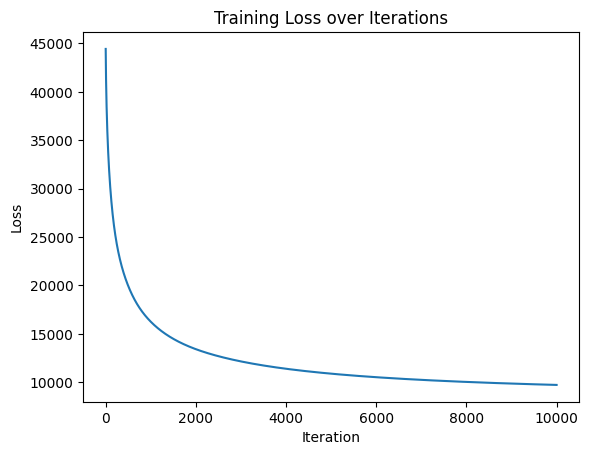

Final Loss: 9717.787897493286


In [6]:
import matplotlib.pyplot as plt
import time

n_iter = 10000
learning_rate = 0.0001
losses = []

start_time = time.time()
# Actualitzat per utilitzar la versió speedup
for i in range(n_iter):
    loss = backpropagation(model, Xsp, Ysp, learning_rate)
    losses.append(loss)
    if i % 1000 == 0:
        print(f"Iteration {i}: Loss = {loss}")
        
print(f"Training time: {time.time() - start_time}")
plt.plot(range(len(losses)), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()

print(f"Final Loss: {losses[-1]}")

Podem utilitzar el cosine similarity per veure que tan aprop es troben dos vectors. Aquest algorisme de similitud mesura el cosinus de l'angle entre els vectors utilitzant el producte escalar. Per tant, no té en compte ni la magnitud dels vectors ni la topologia de la varietat local en la que ens trobem.

In [7]:
def get_skipgram_embedding(model, word):
    vec = one_hot_encode(token_to_idx[word], len(token_to_idx))
    return vec @ model["w1"] 

lamine_embedding = get_skipgram_embedding(model, "lamine")
yamal_embedding = get_skipgram_embedding(model, "yamal")
principis_embedding = get_skipgram_embedding(model, "principis")

# Cosine similarity com a aproximació per veure la similitud entre els vectors
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

print(lamine_embedding)
print(yamal_embedding)
print(principis_embedding)

print("Similitud entre lamine i yamal: ", cosine_similarity(lamine_embedding, yamal_embedding))
print("Similitud entre lamine i principis: ", cosine_similarity(lamine_embedding, principis_embedding))

[ 0.30288307  0.24403248 -0.37616754 -1.01481083  0.17823361 -0.74274018
 -1.91271761  0.27114117  0.46014727 -0.89870668  0.30999552  0.6066416
  0.97846162 -1.41175129  0.29335608  0.13713478 -0.25961066 -1.37768418
  0.09075525  1.77192149]
[-0.29656142 -0.07607868 -1.0128667  -0.84245082  0.54586823  0.43067756
 -2.87423222  1.30486508  0.01017038  0.2943407  -1.45779697  1.23971644
  1.55818532 -0.00542836 -0.13126905  0.99757798  0.45560644 -0.05887603
  0.44354699  1.0757689 ]
[ 0.87329128 -1.04631871 -0.71917328  1.0904986   0.03649463  0.55999513
 -0.28664229  0.40356011 -0.42188998 -0.85403237  1.26766485 -1.62771089
  1.7581086   0.57155447 -0.65159194  1.27174316 -0.00828512 -0.29648103
 -0.61343505 -0.03310496]
Similitud entre lamine i yamal:  0.5764180045417071
Similitud entre lamine i principis:  0.038889428646896824


In [8]:
yamal = one_hot_encode(token_to_idx["yamal"], len(token_to_idx))
result = forward_pass(model, [yamal])
result = result["z"]
words = []
for word in (idx_to_token[id] for id in np.argsort(result)[::-1][0]):
    words.append(word)

print("Les 5 paraules més probables d'estar en el context de yamal son: ", words[::-1][:5])

Les 5 paraules més probables d'estar en el context de yamal son:  ['lamine', 'va', 'ser', 'que', 'renovava']


<h3>Negative sampling</h3>

In [9]:
K = 5
window_size = 2

def get_train_data_n(text, window_size, K, vocab_size):
    data = encode(text)
    x = []
    y = []
    negative_y = []
    for i in range(len(data)):
        for j in range(1, window_size+1):
            if i - j >= 0:
                x.append(data[i])
                y.append(data[i - j])
                negative_y.append([np.random.randint(vocab_size) for _ in range(K)])
            if i + j < len(data):
                x.append(data[i])
                y.append(data[i + j])
                negative_y.append([np.random.randint(vocab_size) for _ in range(K)])
        
    return np.asarray(x), np.asarray(y), np.asarray(negative_y)

def get_negative_sampling(text, window_size, K , vocab_size, total_outside):
    data = encode(text)
    num_samples = 2 * (len(data) * window_size - total_outside) # Aquest número és equivalent al número d'iteracions que fem en el mètode get_train_data_n
    negative_y = np.random.randint(low=0, high=vocab_size, size=(num_samples, K))
    
    return negative_y

def get_batch(text, window_size, K, vocab_size, batch_size):
    data = np.asarray(encode(text))
    ix = np.random.randint(0, len(data) - window_size, batch_size)
    context_range = np.concatenate((np.arange(-window_size, 0), np.arange(1, window_size + 1)))
    ix_context = ix[:, None] + context_range[None, :]
    x = np.repeat(data[ix], 2 * window_size)
    y = data[ix_context].flatten()
    num_samples = batch_size * window_size * 2
    negative_y = np.random.randint(low=0, high=vocab_size, size=(num_samples, K))

    return x, y, negative_y

Xn, Yn, negative_y = get_train_data_n(text, window_size, K, vocab_size)
total_outside = sum([i for i in range(window_size+1)])
negative_y = get_negative_sampling(text, window_size, K, vocab_size, total_outside)
x, y, negative_y = get_batch(text, window_size, K, vocab_size, 2)
print(x.shape)
print(y.shape)
print(negative_y.shape)
print(Xn.shape)
print(Yn.shape)
print(negative_y.shape)

(8,)
(8,)
(8, 5)
(3386,)
(3386,)
(8, 5)


Per fer la implementació del negative sampling, el més important és modificar el softmax per a que només tinguin probabilitats el target i els negative samples (el target hauria de tenir una probabilitat propera a 1, i els negative samples, a 0). D'aquesta manera, en la backpropagation, només s'actualitzaran els pesos associats a aquests samples, i softmax serà molt més eficient. Per aconseguir-ho, fem servir una màscara.

In [10]:
def softmax_n(X, targets):
    # Masked softmax for negative sampling
    mask = np.zeros_like(X, dtype=bool)
    mask[np.arange(X.shape[0])[:, None], targets] = True
    
    X_masked = np.where(mask, X, -np.inf)
    X_max = np.max(X_masked, axis=1, keepdims=True)
    exps = np.exp(X_masked - X_max)
    sum_exps = np.sum(exps, axis=1, keepdims=True)
    softmax_values = exps / sum_exps
    
    return np.where(mask, softmax_values, 0)

def forward_pass_n(model, input, target, negative_target):
    state = {}

    state["first_layer"] = model["w1"][input]
    state["second_layer"] = state["first_layer"] @ model["w2"]
    # Sha de passar un X reduit per fer el negative sampling (només amb el positive sampling i els K exemples de més per banda)
    state["z"] = softmax_n(state["second_layer"], np.column_stack((target, negative_target)))
    return state

def cross_entropy_negative(pred, target):
    epsilon = 1e-12
    pred = np.clip(pred, epsilon, 1. - epsilon)
    target_probs = pred[np.arange(len(target)), target]
    
    return - np.sum(np.log(target_probs))

def backpropagation_negative(model, input, target, negative_target, learning_rate):
    state = forward_pass_n(model, input, target, negative_target)
    da2 = np.zeros_like(state["z"])
    np.copyto(da2, state["z"])
    da2[np.arange(da2.shape[0]), target] -= 1
    dw2 = state["first_layer"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = np.zeros_like(model["w1"])
    np.add.at(dw1, input, da1)
    model["w1"] -= learning_rate * dw1
    model["w2"] -= learning_rate * dw2
    return cross_entropy_negative(state["z"], target)
    
model2 = initialitze_model(20)
state = forward_pass_n(model2, x, y, negative_y)
print(state["z"].shape)

(8, 274)


Iteration 0: Loss = 158.69969464268905
Iteration 1000: Loss = 154.70245682092002
Iteration 2000: Loss = 160.48206393879272
Iteration 3000: Loss = 137.62866633573674
Iteration 4000: Loss = 164.78065375190647
Iteration 5000: Loss = 142.161653073944
Iteration 6000: Loss = 159.863142932254
Iteration 7000: Loss = 125.65596308773493
Iteration 8000: Loss = 141.65800225889828
Iteration 9000: Loss = 126.25026480105066
Training time: 17.863486766815186


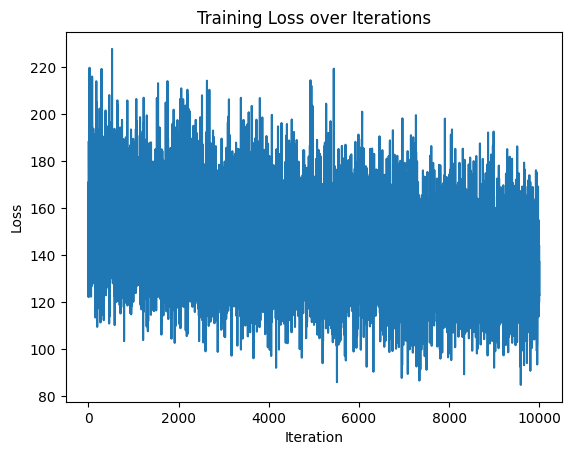

Final Loss: 143.8285307290292


In [24]:
import matplotlib.pyplot as plt
import time

n_iter = 50000
learning_rate = 0.0001
losses = []
batch_size = 32

start_time = time.time()
# Actualitzat per utilitzar la versió speedup
for i in range(n_iter):
    Xn, Yn, negative_y = get_batch(text, window_size, K, vocab_size, batch_size)
    loss = backpropagation_negative(model2, Xn, Yn, negative_y, learning_rate)
    losses.append(loss)
    if i % 1000 == 0:
        print(f"Iteration {i}: Loss = {loss}")
        
print(f"Training time: {time.time() - start_time}")
plt.plot(range(len(losses)), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()

print(f"Final Loss: {losses[-1]}")

In [25]:
lamine_embedding = get_skipgram_embedding(model2, "lamine")
yamal_embedding = get_skipgram_embedding(model2, "yamal")
principis_embedding = get_skipgram_embedding(model2, "principis")

# Cosine similarity com a aproximació per veure la similitud entre els vectors
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

print(lamine_embedding)
print(yamal_embedding)
print(principis_embedding)

print("Similitud entre lamine i yamal: ", cosine_similarity(lamine_embedding, yamal_embedding))
print("Similitud entre lamine i principis: ", cosine_similarity(lamine_embedding, principis_embedding))

[-0.32303698 -0.04040785  0.08125077 -0.98201132 -0.00545777  0.54958606
  0.40811405 -0.22559902 -0.40093403 -0.73167852  0.48671724  0.30723232
  0.89180084 -0.50946227 -0.36765636 -0.15637494  0.23725723 -0.41512356
 -0.58342228 -0.54633403]
[-1.06521125 -0.58739329  0.22890448 -0.39399509  0.06793186 -0.84692275
 -0.67732799 -1.03459535  0.25783169  0.28793924 -0.55466028  0.85215598
  0.91712398 -0.81452459 -0.36601257 -0.72746808 -0.08511067 -0.64601709
 -0.12456471 -0.01849235]
[ 1.13676721  1.33764132  0.51841377  0.4303301  -2.66933154 -0.68045344
  0.65430682 -0.44631946  0.66139231  0.50738539 -0.39108737 -0.47661155
  0.2111731  -1.48414654 -1.22625946  2.00687958  1.15819697 -0.22126364
  1.24996214 -1.14505898]
Similitud entre lamine i yamal:  0.29086195067717857
Similitud entre lamine i principis:  -0.03902632097883464


In [26]:
yamal = one_hot_encode(token_to_idx["lamine"], len(token_to_idx))
result = forward_pass(model2, [yamal])
result = result["z"]
words = []
for word in (idx_to_token[id] for id in np.argsort(result)[::-1][0]):
    words.append(word)

print("Les 5 paraules més probables d'estar en el context de yamal son: ", words[::-1][:5])

Les 5 paraules més probables d'estar en el context de yamal son:  ['va', 'yamal', 'a', 'de', 'deuros']
